### **1. Correlation**

Correlation is a statistical measure that shows how two variables move together. It tells us:

1. Direction- Do they move in the same direction (positive) or opposite (negative)?

2. Strength- How strongly they are related (weak, moderate, or strong).

The most common measure is **Pearson's correlation coefficient** (`r`).

`r` ranges between -1 and +1.

**Types of Correlation**

**Positive Correlation (r > 0)**<br>
- As one variable increases, the other also increases.
- Example: More study hours - Higher exam scores.

**More Examples of positive Correlation**

1. Study hours ⬆  Exam score ⬆

2. Sleep hours ⬆  Concentration ⬆

3. Class attendance ⬆  Understanding ⬆

4. Practice questions ⬆  Test performance ⬆

5. Participation in group study ⬆  Grades ⬆

6. Teacher feedback ⬆  Student improvement ⬆

7. Number of revision sessions ⬆  Retention ⬆

8. Motivation ⬆  Academic achievement ⬆

9. Lecture note reviews ⬆  Recall in exams ⬆

10. Library hours ⬆  GPA ⬆

**Negative Correlation (r < 0)**

- As one variable increases, the other decreases.

- Example: More part time job hours - Lower exam scores.


**More Examples of Negative Correlation**

1. Part-time job hours ⬆  Exam score ⬇

2. Extracurricular hours ⬆  Study time ⬇

3. Screen time (TV/social media) ⬆  Academic performance ⬇

4. Stress level ⬆  Sleep quality ⬇

5. Absenteeism ⬆  Grades ⬇

6. Late-night gaming ⬆  Morning alertness ⬇

7. Procrastination ⬆  Assignment quality ⬇

8. Fatigue ⬆  Productivity ⬇

9. Alcohol consumption ⬆  Cognitive performance ⬇

10. Distractions in study ⬆  Exam score ⬇

**Zero/No Correlation (r ≈ 0)**

- No clear relationship.

- Example: Shoe size - Exam scores.

**Interpreting the Strength using the correlation Coefficient**

`0.0 – 0.2  Very weak (almost no relationship)`

`0.2 – 0.4  Weak`

`0.4 – 0.6  Moderate`

`0.6 – 0.8  Strong`

`0.8 – 1.0 →Very strong`

Example: If correlation between study hours and scores is 0.85, it’s a very strong positive correlation.

**What Correlation Does NOT Mean**

`Correlation ≠ Causation`

Just because two things move together doesn’t mean one causes the other.

**Misleading Correlation**

Ice cream sales ↑ and drowning deaths ↑ in summer

 - They are correlated.

 - But ice cream doesn’t cause drowning.

The real reason is temperature (summer season people tend to go for swimming and lick more ice creams).

This leads us to two key issue Which are;

1. Spurious Correlation
2. Confounding Variables

**Spurious Correlation**

A correlation that looks real but happens by coincidence or due to a hidden factor.

Example: Worldwide cheese consumption correlates with the number of people who died by bedsheet entanglement. (Completely nonsense, but statistically correlated).

**Confounding Variables**

A third variable that influences both the independent and dependent variable.

Example:

Students with higher motivation both study more and score higher.

So it may look like study hours led to higher score, but motivation is the confounder.

**Why Start with Correlation Before Regression?**

Correlation is the first check, “Are these two variables related at all?”

If yes,  regression goes further, “By how much? Is it significant? What happens when we add other factors?”

**Correlation in Codes**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(234)

In [2]:
#  Create synthesis dataset
students = 40
study_hours = np.random.randint(1, 10, students) # ! to 9 hours study
job_hours = np.random.randint(0, 15, students)  # 0 to 14 hours job
sleep_hours = np.random.randint(4, 9, students)    # 4 to 8 hours sleep
extracurricular = np.random.randint(0, 6, students) # 0 to 5 hrs activities

# Exam score: positively influenced by study and study, negatively by job and extra activities
exam_score = (40
              + 5*study_hours       # strong positive
              + 2*sleep_hours        # mild positive
              - 3*job_hours          # strong negative
              - 1*extracurricular    # mild negative
              + np.random.randint(-5,5,students))  # noise

data = pd.DataFrame({
    'Study Hours': study_hours,
    'Job Hours': job_hours,
    'Sleep Hours': sleep_hours,
    'Extracurricular Hours': extracurricular,
    'Exam Score': exam_score
})

In [3]:
data.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [4]:
#  Let's compute the correlation coefficients for each data feature

corr_coefficients = data.corr()
corr_coefficients

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
Study Hours,1.000000,-0.136551,-0.006383,-0.114442,0.694048
Job Hours,-0.136551,1.000000,0.188992,0.209991,-0.782525
Sleep Hours,-0.006383,0.188992,1.000000,0.158029,-0.035653
Extracurricular Hours,-0.114442,0.209991,0.158029,1.000000,-0.276837
Exam Score,0.694048,-0.782525,-0.035653,-0.276837,1.000000


In [5]:
data.columns

Index(['Study Hours', 'Job Hours', 'Sleep Hours', 'Extracurricular Hours',
       'Exam Score'],
      dtype='object')

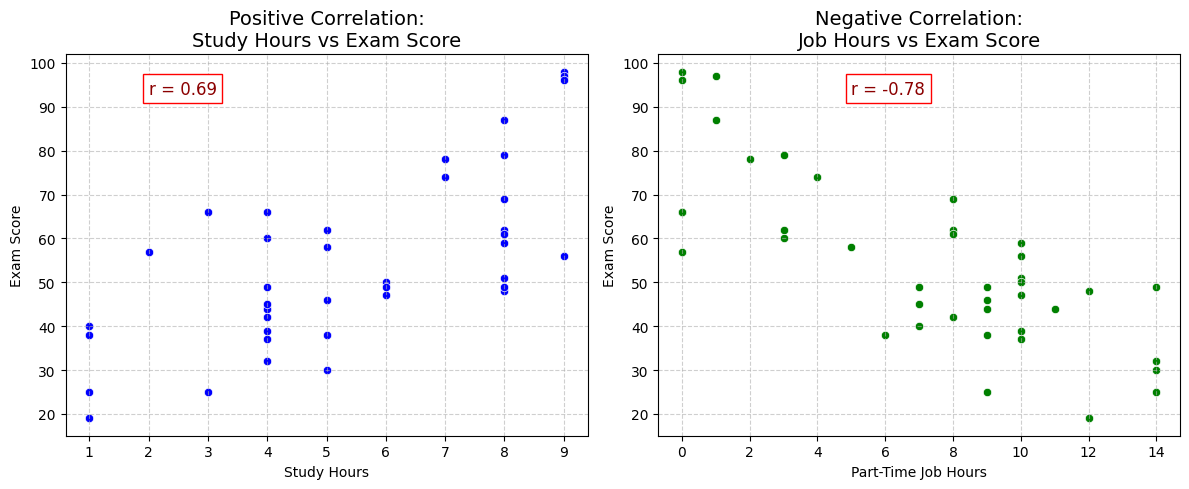

In [6]:
# Plotting the relationship on a scatter plot

# Compute correlation matrix first (this defines 'corr')
corr = data[["Study Hours", "Job Hours", "Exam Score"]].corr()

# Plot: Positive and Negative Examples
plt.figure(figsize=(12, 5))

# Positive correlation: Study vs Score
plt.subplot(1,2,1)
sns.scatterplot(x='Study Hours', y='Exam Score', data=data, color='blue')
plt.title("Positive Correlation:\nStudy Hours vs Exam Score", fontsize=14)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.text(2, max(data['Exam Score'])-5, 
         f"r = {corr.loc['Study Hours','Exam Score']:.2f}",
         fontsize=12, color="darkred", 
         bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

# Negative correlation: Job vs Score
plt.subplot(1,2,2)
sns.scatterplot(x='Job Hours', y='Exam Score', data=data, color='green')
plt.title("Negative Correlation:\nJob Hours vs Exam Score", fontsize=14)
plt.xlabel("Part-Time Job Hours")
plt.ylabel("Exam Score")
plt.text(5, max(data['Exam Score'])-5, 
         f"r = {corr.loc['Job Hours','Exam Score']:.2f}",   # fixed here
         fontsize=12, color="darkred", 
         bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()